## import pandas to work on csv file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("1 - India_Economic_Growth_Historical_Data.csv")

In [3]:
df.head()

,Unnamed: 0,year,GDP,Per_Capita,Annual_percent_geowth
0,0,2022,"$3,416.65B","$2,411",7.24%
1,1,2021,"$3,150.31B","$2,238",9.05%
2,2,2020,"$2,671.60B","$1,913",-5.83%
3,3,2019,"$2,835.61B","$2,050",3.87%
4,4,2018,"$2,702.93B","$1,974",6.45%


#### drop the first column with name Unnamed: 0 since it is an unwanted column

In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.head(5)

,year,GDP,Per_Capita,Annual_percent_geowth
0,2022,"$3,416.65B","$2,411",7.24%
1,2021,"$3,150.31B","$2,238",9.05%
2,2020,"$2,671.60B","$1,913",-5.83%
3,2019,"$2,835.61B","$2,050",3.87%
4,2018,"$2,702.93B","$1,974",6.45%


## check if there is any null values

<Axes: >

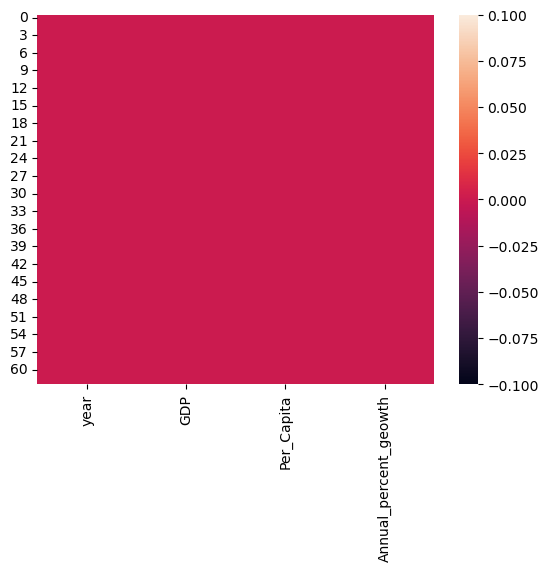

In [7]:
sns.heatmap(df.isna())

In [10]:
df['year'].unique()

#there are no unwanted values

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
       1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
       1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
       1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960], dtype=int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   63 non-null     int64 
 1   GDP                    63 non-null     object
 2   Per_Capita             63 non-null     object
 3   Annual_percent_geowth  63 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


>Except year everthing else is objects, which means we can't visualize most of the attributes

### here, GDP and Percapita are object, we have to convert that into integer

In [13]:
df['GDP']

0     $3,416.65B
1     $3,150.31B
2     $2,671.60B
3     $2,835.61B
4     $2,702.93B
         ...    
58       $56.48B
59       $48.42B
60       $42.16B
61       $39.23B
62       $37.03B
Name: GDP, Length: 63, dtype: object

In [14]:
df['GDP'] = df['GDP'].map(lambda x: x.lstrip('$').rstrip('B')) 
#Remove $ from the front and B from Back(left,Right)

df['GDP'] = df['GDP'].str.replace(',', '').astype(float)

df['GDP'] = df['GDP'] * (10**9) #since a billion has 1 followed by 9 zeros

In [16]:
df['GDP']

0     3.416650e+12
1     3.150310e+12
2     2.671600e+12
3     2.835610e+12
4     2.702930e+12
          ...     
58    5.648000e+10
59    4.842000e+10
60    4.216000e+10
61    3.923000e+10
62    3.703000e+10
Name: GDP, Length: 63, dtype: float64

In [17]:
df['Per_Capita'] = df['Per_Capita'].map(lambda x: x.lstrip('$')) #remove $ from the left side
df['Per_Capita'] = df['Per_Capita'].str.replace(',', '').astype(float) #remove the , from the string and change it to numeric

In [18]:
df['Per_Capita']

0     2411.0
1     2238.0
2     1913.0
3     2050.0
4     1974.0
       ...  
58     115.0
59     101.0
60      90.0
61      86.0
62      83.0
Name: Per_Capita, Length: 63, dtype: float64

In [19]:
df['Annual_percent_geowth'] = df['Annual_percent_geowth'].map(lambda x: x.rstrip('%')) #remove % from the percentage growth
df['Annual_percent_geowth'] = df['Annual_percent_geowth'].str.replace(',', '').astype(float) #remove , and conver it to numeric

In [20]:
df['Annual_percent_geowth']

0     7.24
1     9.05
2    -5.83
3     3.87
4     6.45
      ... 
58    7.45
59    5.99
60    2.93
61    3.72
62    0.00
Name: Annual_percent_geowth, Length: 63, dtype: float64

In [22]:
df.describe()

,year,GDP,Per_Capita,Annual_percent_geowth
count,63.000000,6.300000e+01,63.000000,63.000000
mean,1991.000000,7.419332e+11,627.619048,5.058571
std,18.330303,9.251474e+11,646.537438,3.262885
min,1960.000000,3.703000e+10,83.000000,-5.830000
25%,1975.500000,1.011250e+11,162.000000,3.760000
50%,1991.000000,2.960400e+11,346.000000,5.710000
75%,2006.500000,1.069580e+12,898.000000,7.500000
max,2022.000000,3.416650e+12,2411.000000,9.630000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   63 non-null     int64  
 1   GDP                    63 non-null     float64
 2   Per_Capita             63 non-null     float64
 3   Annual_percent_geowth  63 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.1 KB


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

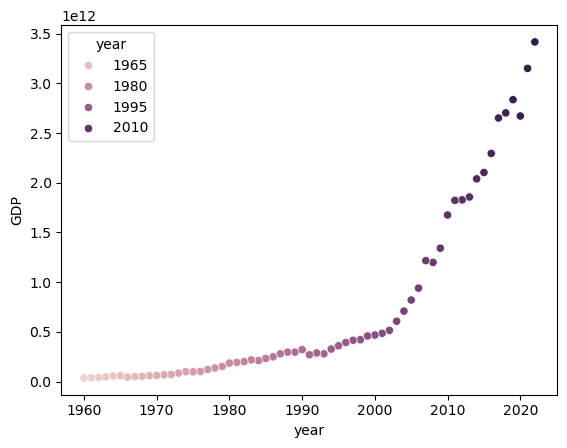

In [41]:
sns.scatterplot(x ="year", y = 'GDP', hue = 'year',data=df)
plt.show()

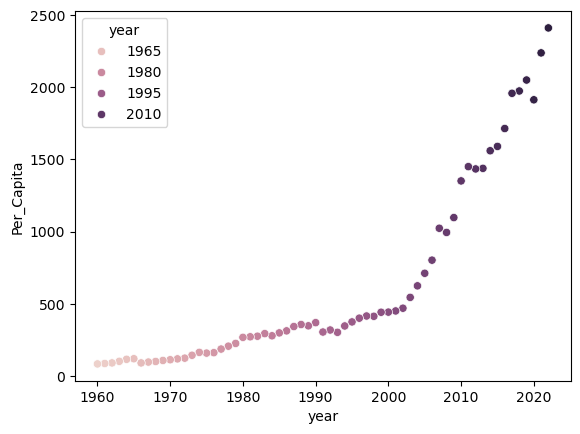

In [43]:
sns.scatterplot(x ="year", y = 'Per_Capita', hue = 'year',data=df)
plt.show()

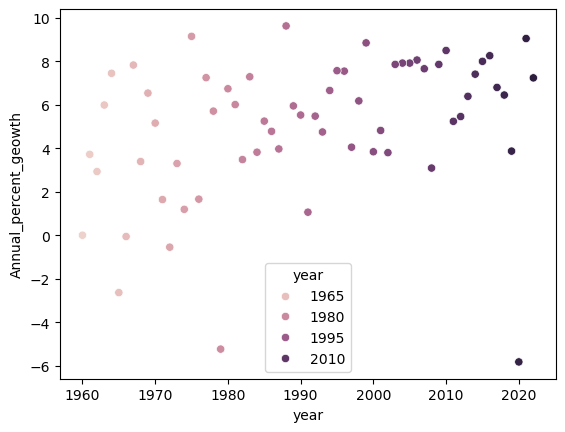

In [44]:
sns.scatterplot(x ="year", y = 'Annual_percent_geowth', hue = 'year',data=df)
plt.show()

In [53]:
filepath = "C:/Users/user/Downloads/"
filename = "Processed Data.csv"

df.to_csv(filepath+filename)